In [1]:
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Carregando a base de dados "breast cancer" do sklearn

In [2]:
bc = datasets.load_breast_cancer()
x = bc.data
y = bc.target

In [3]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
x.shape

(569, 30)

#### Divisão da base de dados em conjunto de treino e de teste

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state=1, stratify = y)

In [7]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [212 357]
Labels counts in y_train: [148 250]
Labels counts in y_test: [ 64 107]


#### Definição de pipeline e e hiperparâmetros para a construção de modelos

In [8]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('pca', PCA()),
        ('dec_tree', DecisionTreeClassifier())])

In [9]:
parameters = {
    'pca__n_components': list(range(1, 4)),
    'dec_tree__criterion': ['gini', 'entropy'],
    'dec_tree__max_depth': list(range(1, 10, 2))
}

#### Otimização de hiperparâmetros utilizando gridsearch

In [10]:
dt_model = GridSearchCV(pipe, param_grid = parameters)

In [11]:
dt_model.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('z-score', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [1, 3, 5, 7, 9],
                         'pca__n_components': [1, 2, 3]})

In [12]:
dt_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('z-score', StandardScaler()),
  ('pca', PCA(n_components=2)),
  ('dec_tree', DecisionTreeClassifier(max_depth=3))],
 'verbose': False,
 'z-score': StandardScaler(),
 'pca': PCA(n_components=2),
 'dec_tree': DecisionTreeClassifier(max_depth=3),
 'z-score__copy': True,
 'z-score__with_mean': True,
 'z-score__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'dec_tree__ccp_alpha': 0.0,
 'dec_tree__class_weight': None,
 'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 3,
 'dec_tree__max_features': None,
 'dec_tree__max_leaf_nodes': None,
 'dec_tree__min_impurity_decrease': 0.0,
 'dec_tree__min_samples_leaf': 1,
 'dec_tree__min_samples_split': 2,
 'dec_tree__min_weight_fraction_leaf': 0.0,
 'dec_tree__random_state': None,
 'dec_tree__splitter': 'b

In [13]:
print('Best Criterion:', dt_model.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', dt_model.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', dt_model.best_estimator_.get_params()['pca__n_components'])
print()
print(dt_model.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 3
Best Number Of Components: 2

DecisionTreeClassifier(max_depth=3)


#### Utilização dos melhores parâmetros encontrados no gridsearch para construção de uma árvore de decisão

Em vez de fazer todos os passos abaixo (o que pode acarretar em erros) para a construção do modelo, podemos
utilizar obter o "melhor" pipeline gerado pelo gridsearch.

Exemplo:

bst_model = dt_model.best_estimator_

In [14]:
model = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')

In [15]:
zs = StandardScaler()
x_train_zs = zs.fit_transform(x_train)
x_test_zs = zs.fit_transform(x_test)

In [16]:
pc = PCA(n_components = 2)
x_train_pp = pc.fit_transform(x_train_zs)
x_test_pp = pc.fit_transform(x_test_zs)

In [17]:
model.fit(x_train_pp, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
res2 = model.predict(x_test_pp)

In [19]:
accuracy_score(y_test, res2)

0.9122807017543859

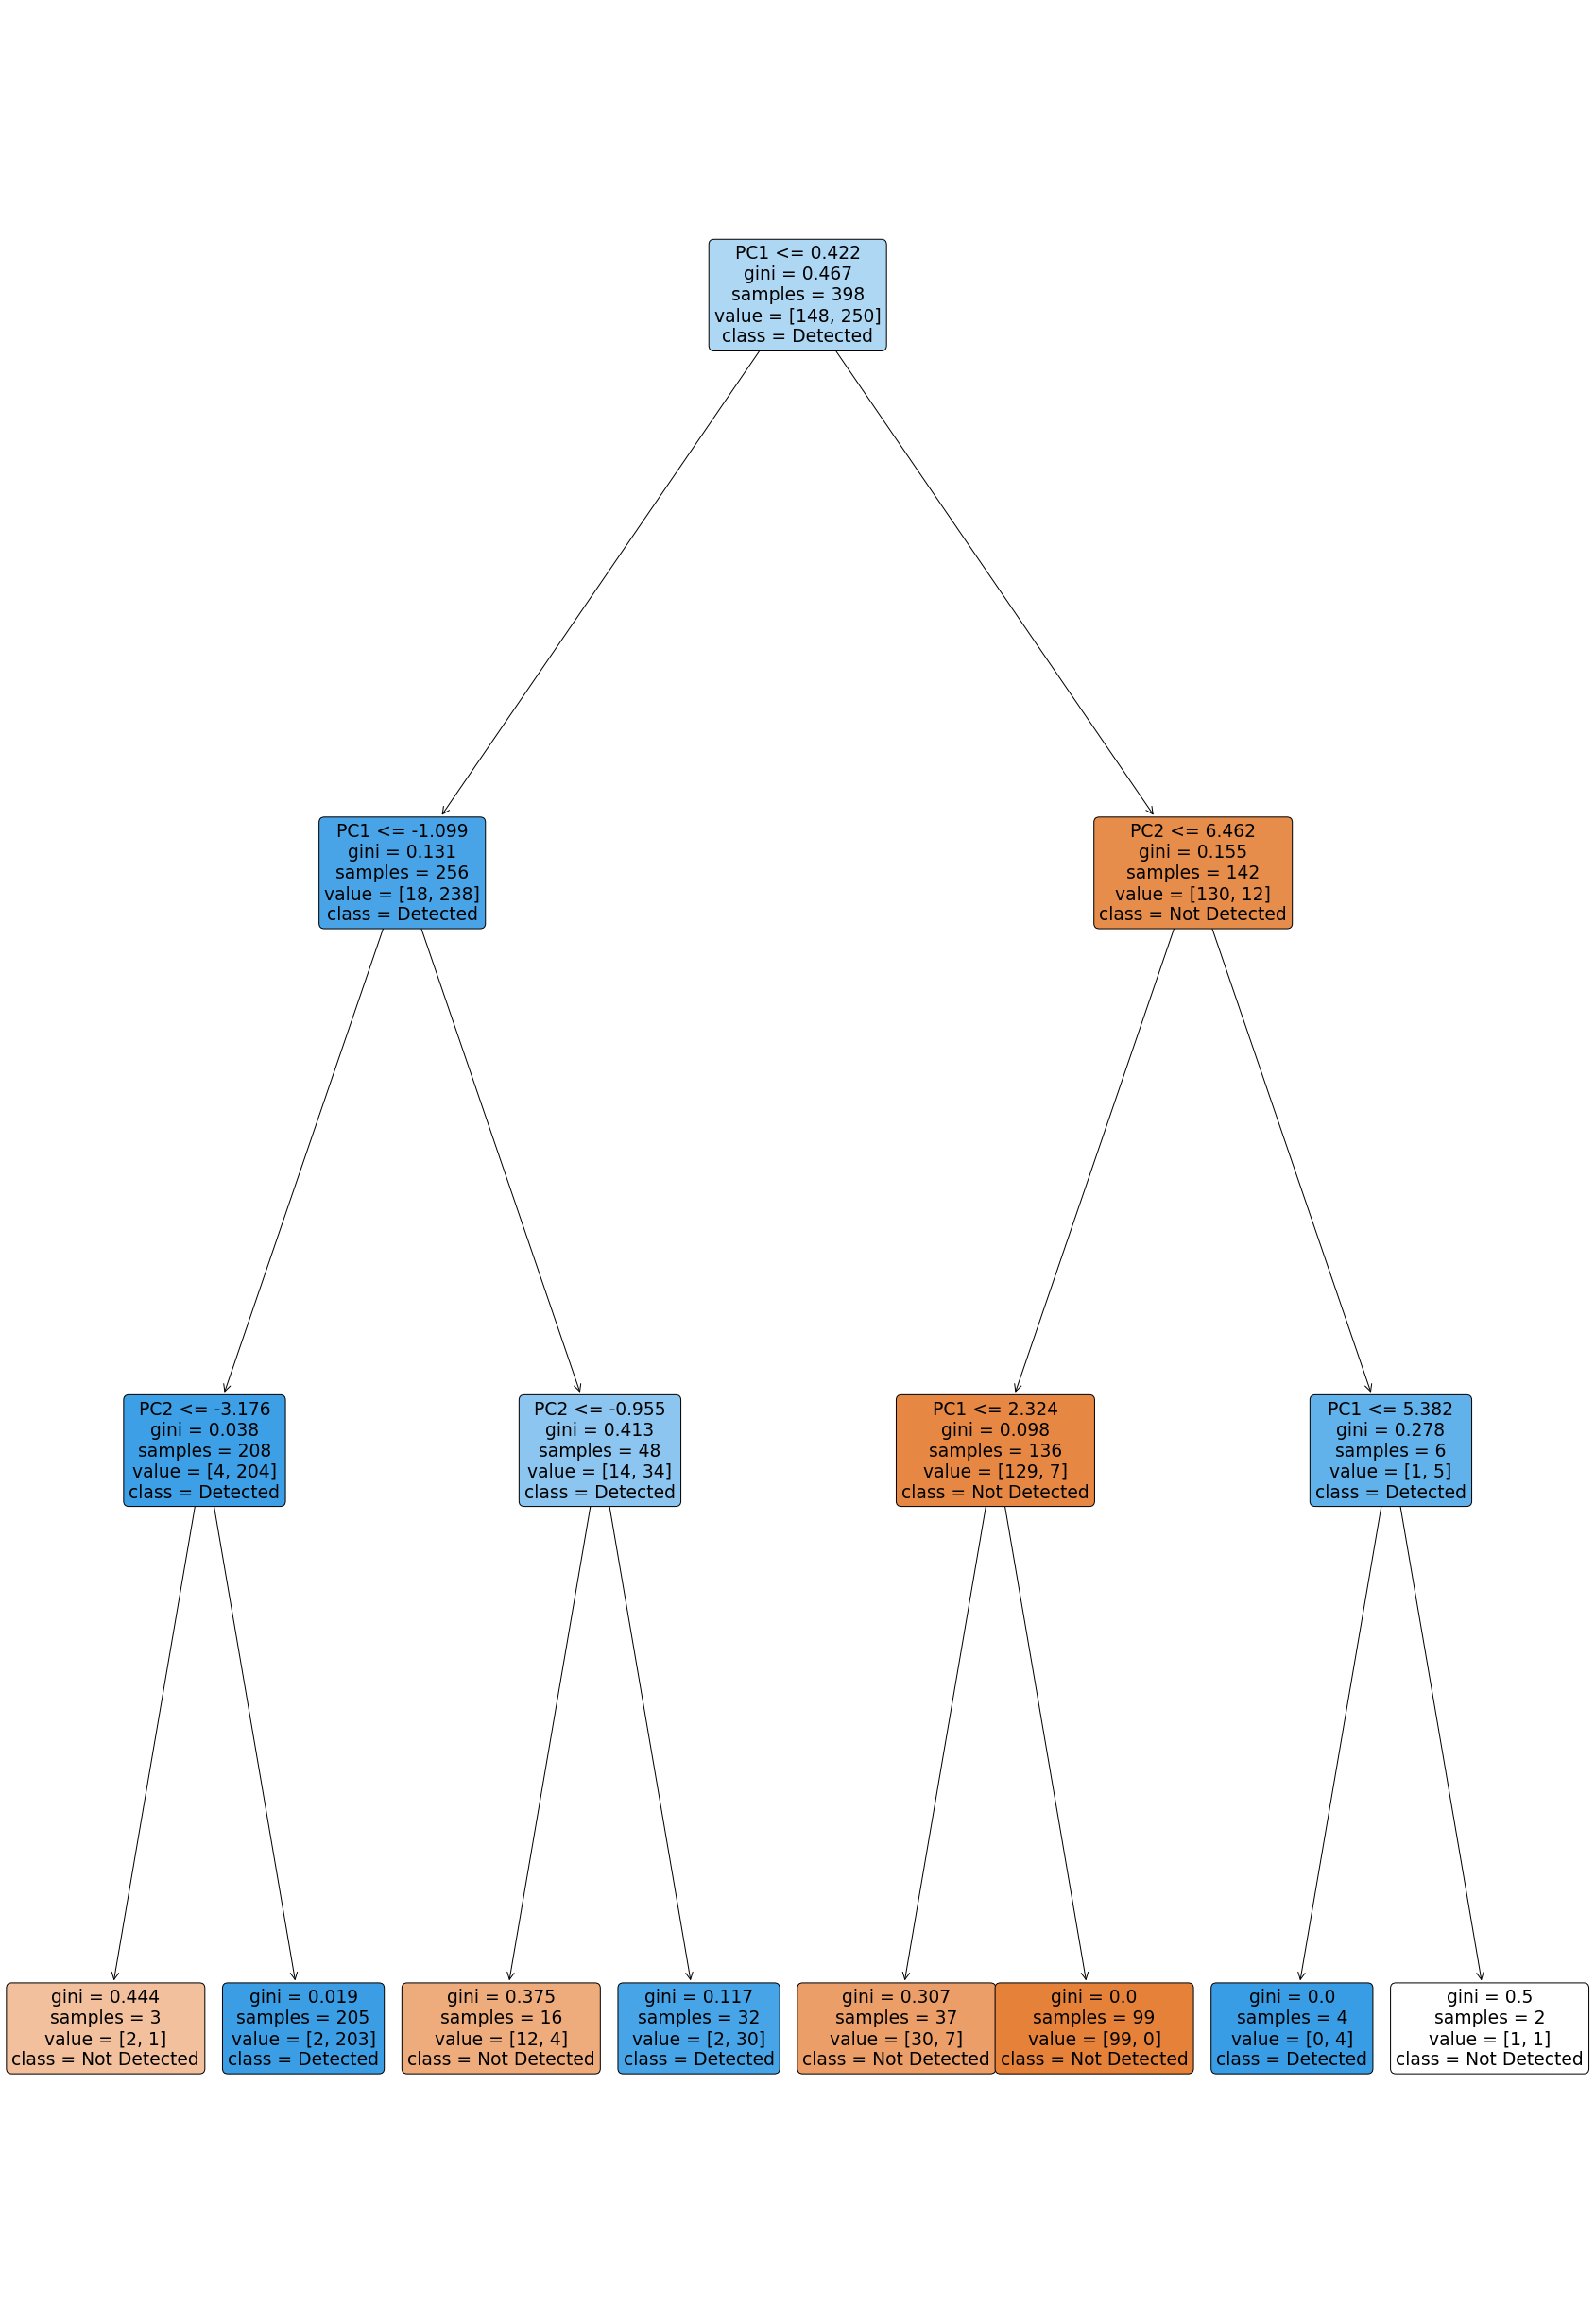

In [20]:
plt.figure(figsize=(30, 45))

plot_tree(model,
          filled=True,
          rounded=True,
          class_names=['Not Detected', 'Detected'],
          feature_names=['PC1', 'PC2'])

plt.show()